In [51]:
from tqdm import tqdm

In [52]:
for i in tqdm(range(10000)):
    pass

100%|█████████████████████████████████████████| 10000/10000 [00:00<00:00, 1428334.41it/s]


In [53]:
for i in tqdm(range(int(10000)), ascii=True, desc="Downloading"):
    pass

Downloading: 100%|############################| 10000/10000 [00:00<00:00, 1429015.71it/s]


In [54]:
import os
import pandas as pd
import numpy as np
import librosa
import librosa.display
from IPython.display import Audio
import matplotlib.pyplot as plt
import scipy
from scipy.io import wavfile
import scipy.fftpack as fftpk
from scipy.fft import fft
from python_speech_features import mfcc, logfbank

In [55]:
def plot_signals(signals):
    fig, axes=plt.subplots(nrows=2, ncols=5, sharex=False, sharey=True, figsize=(20,5))
    fig.suptitle("Time Series", size=16)
    i=0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(signals.keys())[i])
            axes[x,y].plot(list(signals.values())[i])
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i +=1

In [56]:
def plot_fft(fft):
    fig, axes=plt.subplots(nrows=2, ncols=5, sharex=False, sharey=True, figsize=(20,5))
    fig.suptitle("Fourier Transforms", size=16)
    i=0
    for x in range(2):
        for y in range(5):
            data=list(fft.values())[i]
            Y, freq=data[0], data[1]
            axes[x,y].set_title(list(fft.keys())[i])
            axes[x,y].plot(freq, Y)
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i +=1    

In [57]:
def plot_fbank(fbank):
    fig, axes=plt.subplots(nrows=2, ncols=5, sharex=False, sharey=True, figsize=(20,5))
    fig.suptitle("Filter Bank Coefficients", size=16)
    i=0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(fbank.keys())[i])
            axes[x,y].imshow(list(fbank.values())[i], cmap="hot", interpolation="nearest")
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i +=1

In [58]:
def plot_mfccs(mfccs):
    fig, axes=plt.subplots(nrows=2, ncols=5, sharex=False, sharey=True, figsize=(20,5))
    fig.suptitle("Mel Frequency Cepstrum Coefficients", size=16)
    i=0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(mfccs.keys())[i])
            axes[x,y].imshow(list(mfccs.values())[i], cmap="hot", interpolation="nearest")
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i +=1

In [59]:
def calc_fft(signal, rate):
    n=len(signal)
    # Real FFT, takes length of signals and spacing between individual samples
    freq=np.fft.rfftfreq(n, d=1/rate)
    # Calculating magnitude
    Y = abs(np.fft.rfft(signal)/n)
    return (Y, freq)

In [60]:
audio_files_path = os.path.abspath("UrbanSound8K/audio/")
metadata_path = os.path.abspath("UrbanSound8K/metadata/UrbanSound8K.csv")

df= pd.read_csv(metadata_path, usecols=["slice_file_name", "fold", "class"])
df.set_index("slice_file_name", inplace=True)
df

,fold,class
slice_file_name,,
100032-3-0-0.wav,5,dog_bark
100263-2-0-117.wav,5,children_playing
100263-2-0-121.wav,5,children_playing
100263-2-0-126.wav,5,children_playing
100263-2-0-137.wav,5,children_playing
...,...,...
99812-1-2-0.wav,7,car_horn
99812-1-3-0.wav,7,car_horn
99812-1-4-0.wav,7,car_horn


In [61]:
audio_files_path
fold=5
file="100032-3-0-0.wav"
print(f"{audio_files_path}/fold{fold}/{file}")
rate, signal = wavfile.read(f"{audio_files_path}/fold{fold}/{file}")
rate,len(signal)

C:\Users\Acelya\Downloads\UrbanSound8K\audio/fold5/100032-3-0-0.wav


(44100, 14004)

In [62]:
for file, fold in df["fold"].items():
    signal, rate = librosa.load(f"{audio_files_path}/fold{fold}/{file}", sr=None)
    # Creating column as length which gives us duration of the signals in seconds
    df.at[file, "length"] = len(signal) / rate

In [63]:
df

,fold,class,length
slice_file_name,,,
100032-3-0-0.wav,5,dog_bark,0.317551
100263-2-0-117.wav,5,children_playing,4.000000
100263-2-0-121.wav,5,children_playing,4.000000
100263-2-0-126.wav,5,children_playing,4.000000
100263-2-0-137.wav,5,children_playing,4.000000
...,...,...,...
99812-1-2-0.wav,7,car_horn,4.000000
99812-1-3-0.wav,7,car_horn,2.140000
99812-1-4-0.wav,7,car_horn,3.505986


In [64]:
df.to_csv('UrbanSound8K_splitted.csv')

In [65]:
classes = list(np.unique(df["class"]))
classes

['air_conditioner',
 'car_horn',
 'children_playing',
 'dog_bark',
 'drilling',
 'engine_idling',
 'gun_shot',
 'jackhammer',
 'siren',
 'street_music']

In [66]:
class_dist=df.groupby(["class"])["length"].mean()
class_dist

class
air_conditioner     3.994928
car_horn            2.456123
children_playing    3.962095
dog_bark            3.148281
drilling            3.546295
engine_idling       3.935952
gun_shot            1.647699
jackhammer          3.610732
siren               3.910314
street_music        4.000000
Name: length, dtype: float64

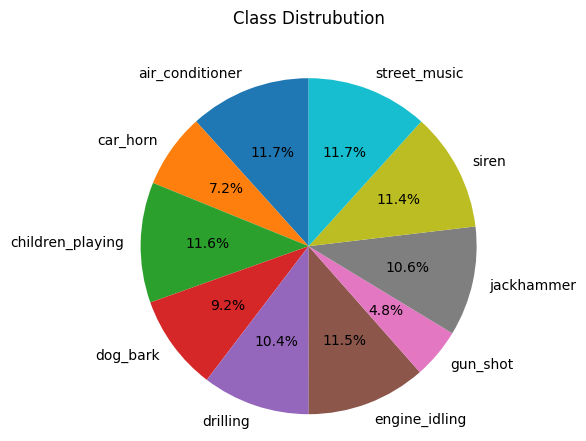

In [67]:
fig, ax=plt.subplots()
ax.set_title("Class Distrubution", y=1.08)
ax.pie(class_dist, labels=class_dist.index, autopct="%1.1f%%", shadow=False, startangle=90)
ax.axis("equal")
plt.show()

In [69]:
for file, fold in df["fold"].items():
    signal, rate = librosa.load(f"{audio_files_path}/fold{fold}/{file}", sr=None)
    print(rate)

44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
48000
48000
48000
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
4410

44100
44100
44100
44100
44100
96000
96000
96000
96000
96000
96000
96000
96000
48000
48000
48000
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
48000
48000
48000
48000
48000
48000
48000
48000
44100
44100
44100
44100
44100
44100
44100
44100
44100
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
44100
44100
44100
4410

48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
96000
96000
96000
96000
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
192000
192000
192000
192000
192000
192000
192000
192000
192000
192000
192000
192000
192000
192000
192000
192000
192000
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100

44100
44100
44100
44100
44100
44100
44100
44100
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
96000
96000
96000
96000
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
96000
96000
96000
96000
96000
96000
96000
96000
96000
96000
9600

48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
44100
44100
44100
44100
44100
4410

44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
48000
48000
48000
48000
48000
48000
48000
48000
44100
44100
44100
44100
44100
44100
44100
44100
11025
11025
11025
11025
11025
11025
11025
11025
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
4410

44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
48000
48000
48000
48000
48000
48000
48000
48000
48000
44100
44100
44100
44100
48000
48000
48000
48000
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
48000
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
44100
4410

In [78]:
df.reset_index(inplace=True)
df

,slice_file_name,fold,class,length
0,100032-3-0-0.wav,5,dog_bark,0.317551
1,100263-2-0-117.wav,5,children_playing,4.000000
2,100263-2-0-121.wav,5,children_playing,4.000000
3,100263-2-0-126.wav,5,children_playing,4.000000
4,100263-2-0-137.wav,5,children_playing,4.000000
...,...,...,...,...
8727,99812-1-2-0.wav,7,car_horn,4.000000
8728,99812-1-3-0.wav,7,car_horn,2.140000
8729,99812-1-4-0.wav,7,car_horn,3.505986
8730,99812-1-5-0.wav,7,car_horn,2.530000


In [80]:
for c in classes:
    wav_file =df[df["class"] == c].iloc[0,0]
    print(wav_file)

100852-0-0-0.wav
100648-1-0-0.wav
100263-2-0-117.wav
100032-3-0-0.wav
103199-4-0-0.wav
102857-5-0-0.wav
102305-6-0-0.wav
103074-7-0-0.wav
102853-8-0-0.wav
101848-9-0-0.wav


In [81]:
for c in classes:
    wav_file =df[df["class"] == c].iloc[0,1]
    print(wav_file)

5
10
5
5
3
10
1
1
7
7


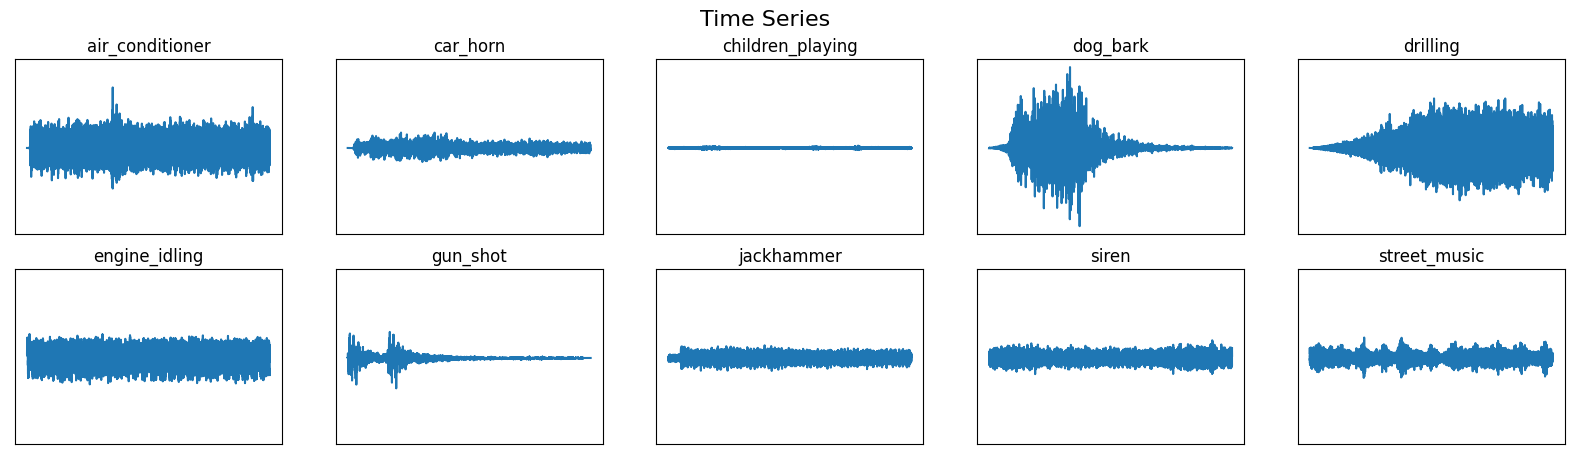

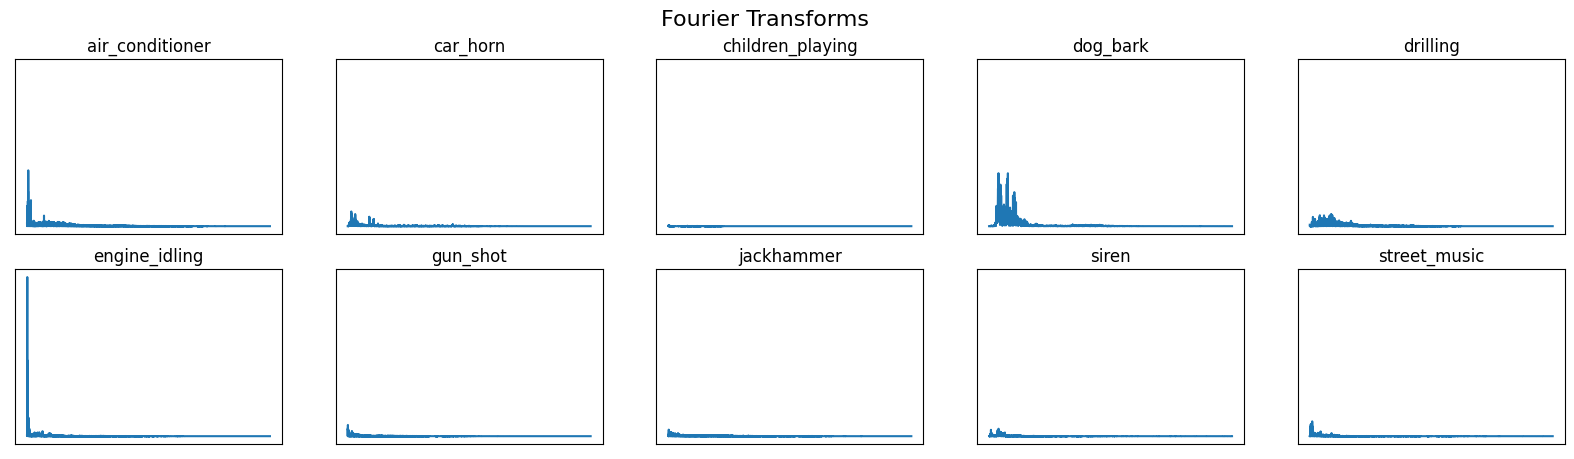

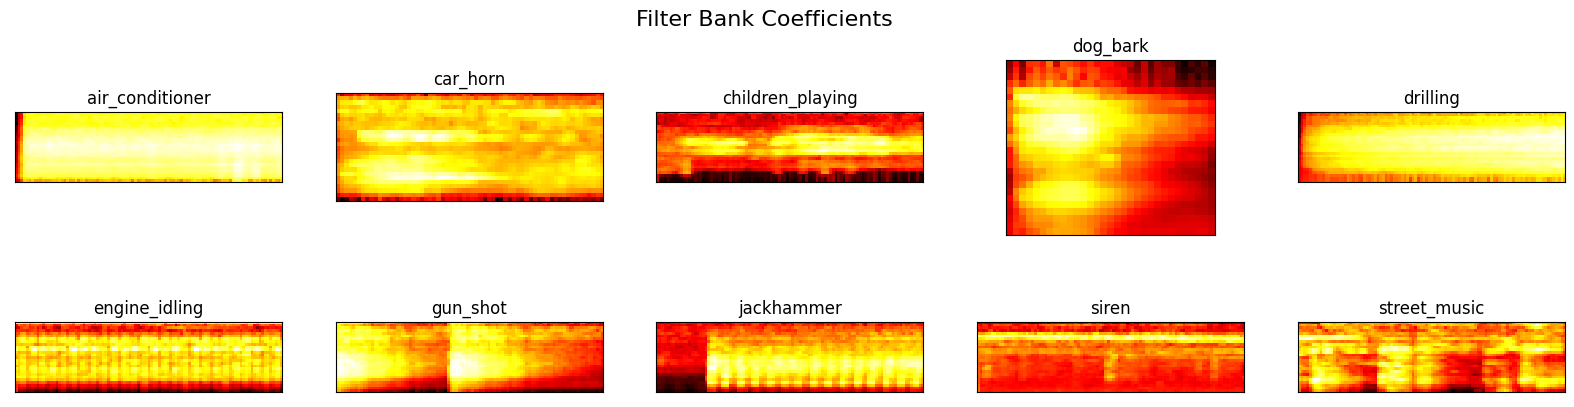

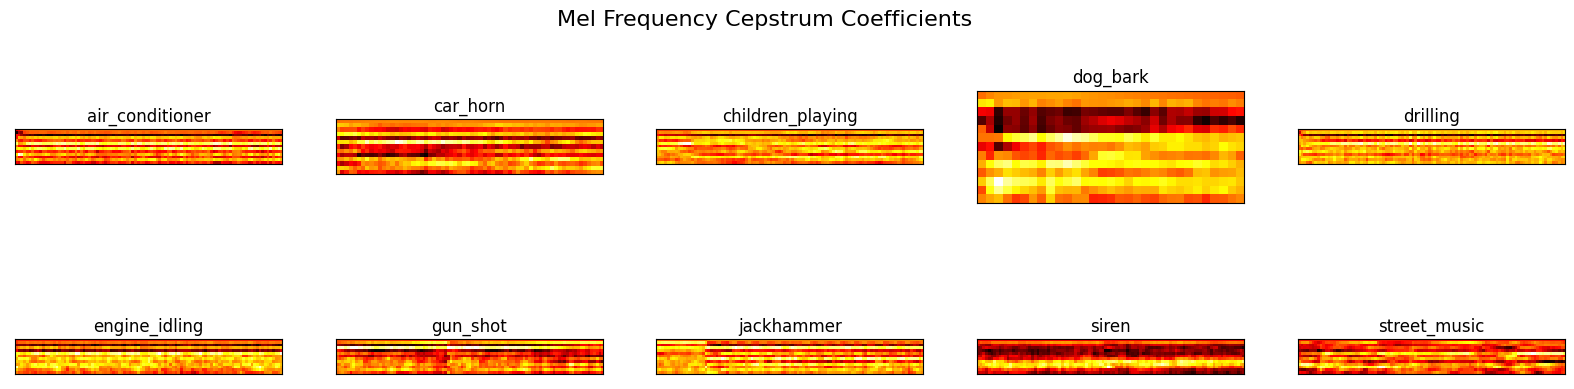

In [85]:
signals={}
fft={}
fbank={}
mfccs={}

for c in classes:
    fold_num =df[df["class"] == c].iloc[0,1]
    wav_file =df[df["class"] == c].iloc[0,0]
    signal, rate = librosa.load(f"{audio_files_path}/fold{fold_num}/{wav_file}", sr=None)
    signals[c]=signal
    fft[c]=calc_fft(signal,rate)
    
    bank=logfbank(signal[:rate],rate, nfft=1200).T
    fbank[c]=bank
    mel = mfcc(signal[:rate], rate, nfft=1200).T
    mfccs[c]=mel
    
plot_signals(signals)
plt.show()

plot_fft(fft)
plt.show()

plot_fbank(fbank)
plt.show()

plot_mfccs(mfccs)
plt.show()

If magnitude is very low, dead spaces can be removed from audio by looking with time series.

[Python Speech Features](https://python-speech-features.readthedocs.io/en/latest/)

In [95]:
# Creating a function to determine dead signal and remove
def envelope(signal, rate, threshold):
    mask = []
    y = pd.Series(signal).apply(np.abs)
    y_mean = y.rolling(window=int(rate/20),
                       min_periods=1,
                       center=True).max()
    for mean in y_mean:
        if mean > threshold:
            mask.append(True)
        else:
            mask.append(False)
    return mask

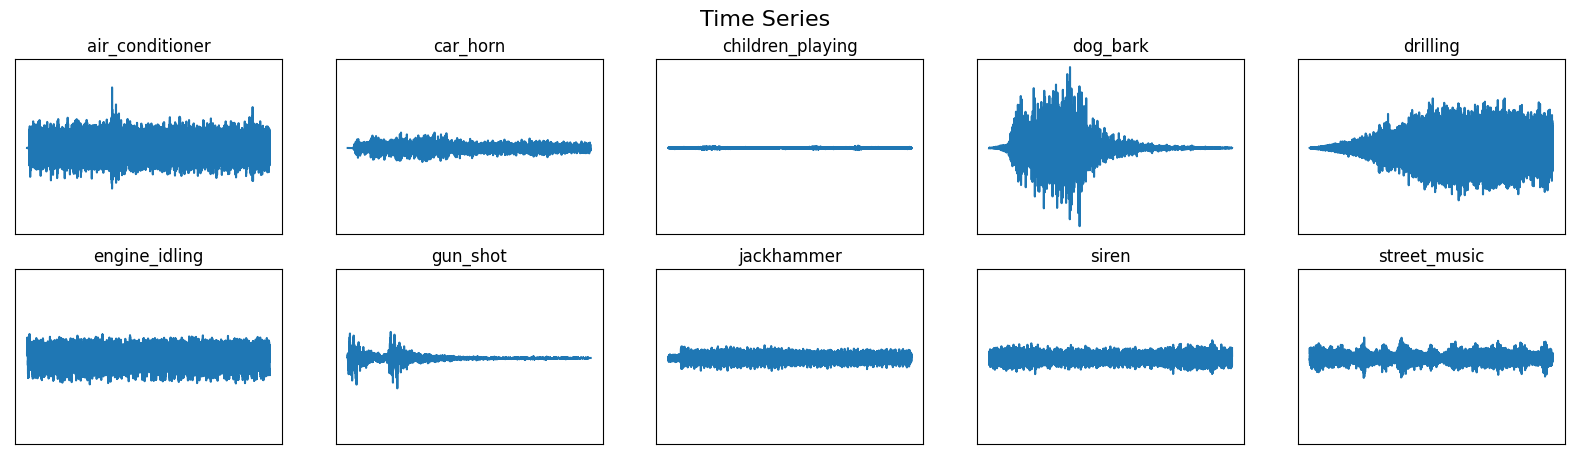

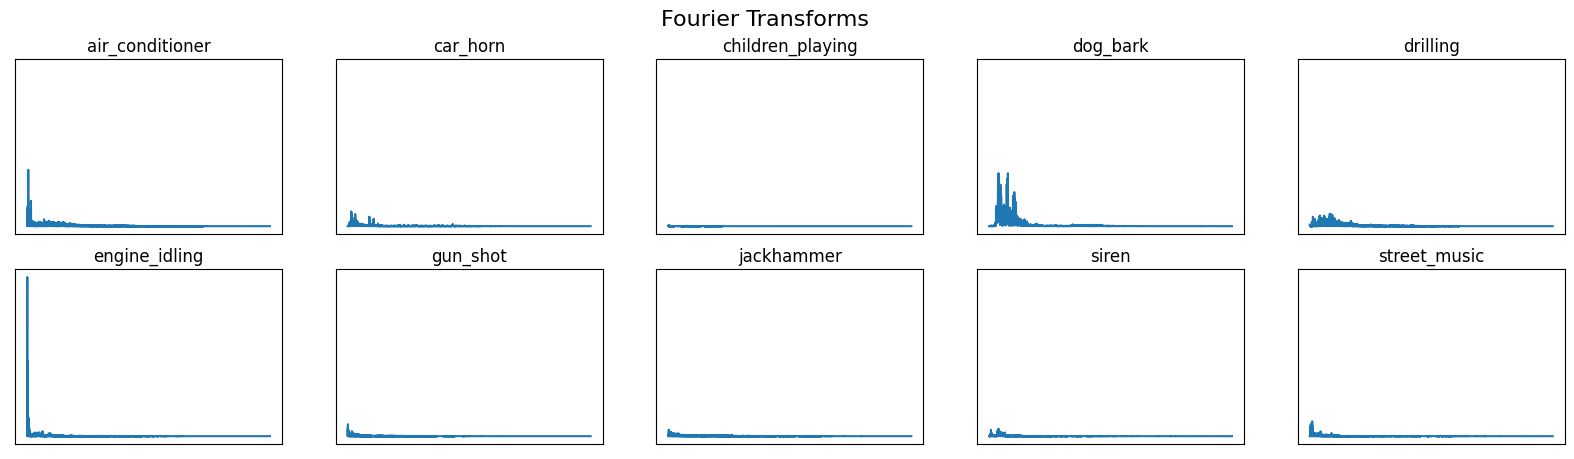

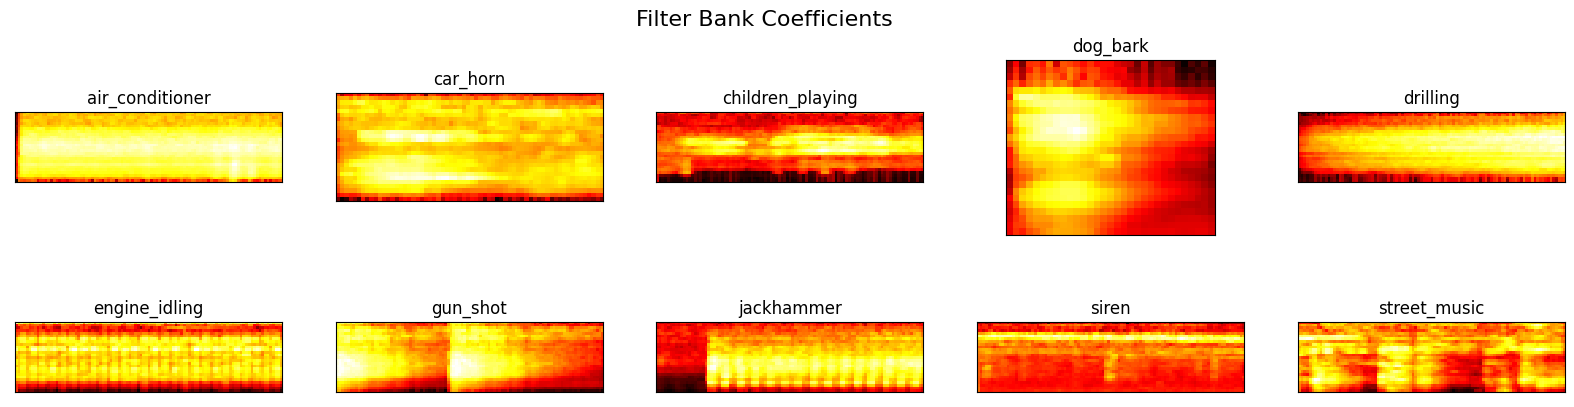

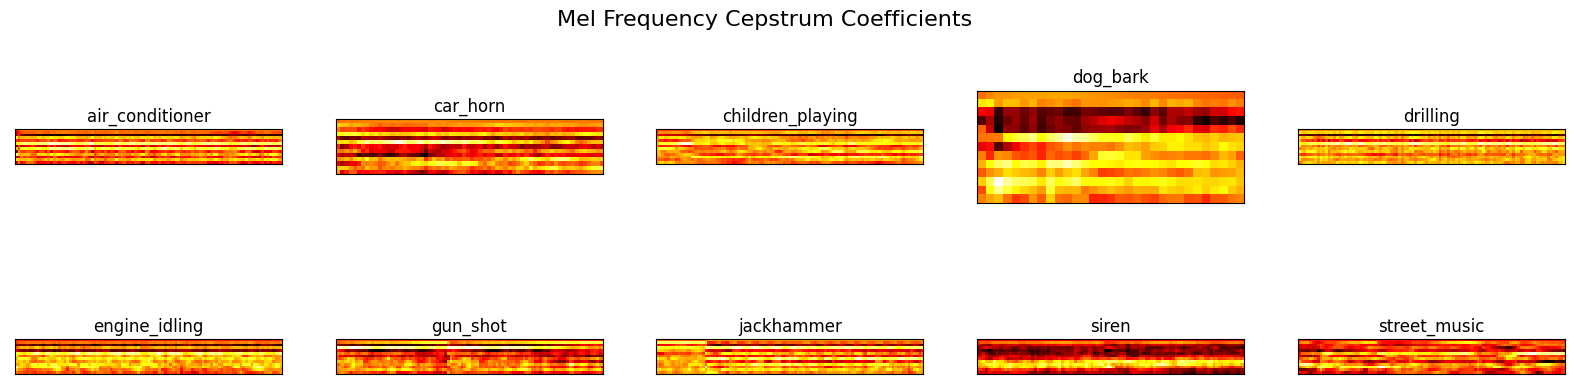

In [111]:
signals={}
fft={}
fbank={}
mfccs={}

for c in classes:
    fold_num =df[df["class"] == c].iloc[0,1]
    wav_file =df[df["class"] == c].iloc[0,0]
    signal, rate = librosa.load(f"{audio_files_path}/fold{fold_num}/{wav_file}", sr=None)
    # Thresold should be determine according to audio files
    mask=envelope(signal,rate, 0.005)
    signal=signal[mask]
    signals[c]=signal
    
    fft[c]=calc_fft(signal,rate)
    
    bank=logfbank(signal[:rate],rate, nfft=1200).T
    fbank[c]=bank
    
    mel = mfcc(signal[:rate], rate, nfft=1200).T
    mfccs[c]=mel
    
plot_signals(signals)
plt.show()

plot_fft(fft)
plt.show()

plot_fbank(fbank)
plt.show()

plot_mfccs(mfccs)
plt.show()

In [ ]:
df.set_index("slice_file_name", inplace=True)

In [121]:
if len(os.listdir("clean/fold1")) == 0:
    for file, fold in df["fold"].items():
        signal, rate = librosa.load(f"{audio_files_path}/fold{fold}/{file}", sr=None)
        wavfile.write(filename=f"clean/fold{fold}/"+file, rate=rate, data=signal)